In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy
from tqdm import tqdm

import hexbin_functions as hexfunc
import h3
import pandas as pd

# import matplotlib.animation as animation
# from IPython.display import Video

/nethome/6525954/.conda/envs/nemo-ensemble/lib/python3.12/site-packages/h3/unstable/__init__.py:4: UserWarning: Modules under `h3.unstable` are experimental, and may change at any time.
  warnings.warn(


We created the particle ensembles from an hexagonal bins that cover the whole domain. We used the uber hexbin standar to cover the full domain with hexagons. The advantage of the hexagons compared to a rectangular grid is that the area of each bin or hexagon is preserved for bins defined in northen most latitudes compared to equatorial latitudes.

To test the sensitivity to initial conditions We released particles from various hexbin resoltuions.

- Build the grid for the domain
- Build the h=3 grid for a test release varying h and time of release
- 

## 1. Create a hexbin grid for analysis

from https://geojson.io/#map=2.3/26.75/-57.76

In [2]:
analysis_domain = {"type": "Polygon",
             "coordinates":[
            [
              [-11.822893415749334, -40.23801650181767],
              [-11.822893415749334, 15.387486455874438],
              [8.792033073539613, 9.095655787137986],
              [8.367846580862306, -10.637813128444293],
              [13.976878143129895, -15.213689978434218],
              [22.78675698886937, -15.35668612999666],
              [31.30769599998723, -6.776917036264734],
              [35.6008091964183, -5.9189401268919255],
              [40.00482553772031, -5.489951672205507],
              [47.23746954864214, 3.947794330899228],
              [52.39763153270559, 7.951686574640263],
              [55.102210578891544, 9.095655787137986],
              [60.28813837922834, 8.666667332451567],
              [69.6239767014489, 8.237678877765177],
              [69.82220081092518, -71.98316214862501],
              [54.275707270715884, -62.83140844864421],
              [51.95920664246336, -59.39950081115204],
              [50.979407770559334, -69.55222757206712],
              [47.43129153037805, -70.69619678456483],
              [31.185442491139668, -82.70787351578895],
              [30.94046154869561, -98.15145788450525],
              [22.918528863560766, -99.86741170325182],
              [17.826710281097746, -96.14951176263473],
              [14.80792018421964, -90.28666954858464],
              [13.560217667977867, -85.56779654703323],
              [8.792033073539613, -82.70787351578895],
              [-2.1834332580455964, -62.25942384239538],
              [-11.822893415749334, -40.23801650181767]
            ]
          ]}

In [3]:
grid_analysis = h3.polyfill(analysis_domain, 3)

In [4]:
len(grid_analysis)

5145

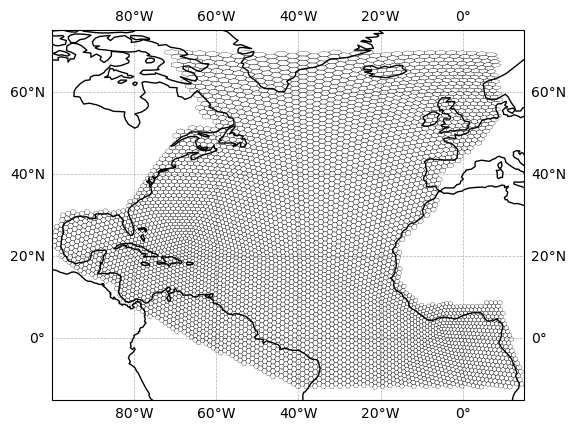

In [5]:
# Plot NA_domain on a map
fig = plt.figure()
ax = plt.axes(projection=cartopy.crs.PlateCarree())
ax.set_extent([-100, 15, -15, 75], crs=cartopy.crs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True, zorder=0, linestyle='--', linewidth=0.5)
hexfunc.pcolorhex(ax, grid_analysis, colors='r', draw_edges=True, fill_polygons=False)

> **TO DO:** Remove hexagones complety inland. Use land mask of model. Also to remove pacific ocean South of Panama.

## 2. Select a subgrid for release

In [6]:
release_domain = {
    "type": "Polygon",
    "coordinates": [
        [
            [31.061978053490776, -80.54521603058427],
            [26.472238822262625, -79.17614396751834],
            [26.365622083983283, -75.12845265062981],
            [19.631294556256606, -67.62831873992342],
            [18.844489303482987, -29.17525122947697],
            [43.81282691338964, -28.163328400254812],
            [44.283445525183424, -63.52110255072721],
            [42.42251216522047, -65.42589846455685],
            [42.55419562516835, -68.34261720760944],
            [35.100369580774796, -74.5332039275576],
            [31.061978053490776, -80.54521603058427],
        ]
    ]
}

In [35]:
grid_release = h3.polyfill(release_domain, 3)

In [36]:
len(grid_release)

1003

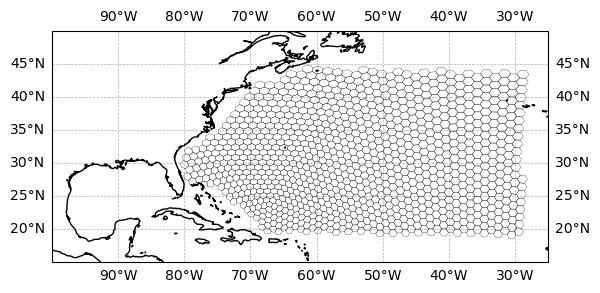

In [37]:
# Plot NA_domain on a map
fig = plt.figure()
ax = plt.axes(projection=cartopy.crs.PlateCarree())
ax.set_extent([-100, -25, 15, 50], crs=cartopy.crs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True, zorder=0, linestyle='--', linewidth=0.5)

# hexfunc.pcolorhex(ax, grid_analysis, colors='b', draw_edges=True, fill_polygons=False)
hexfunc.pcolorhex(ax, grid_release, colors='r', draw_edges=True, fill_polygons=False)

> **OBS:** The hexbins between the analysis grid and the release grid overlap each bin in `h=3` perfectly. It seems that uber hexbins are already predefined and the bins are selected according to the coordinates provided to grid that area.

In [38]:
class initGrid:
    """
    Initialize a hexagonal grid for a particle generation on a given domain.
    """

    def __init__(self, polygon, h3_res=5):
        """
        Initialize a hexagonal grid for a particle generation on a given domain.

        Parameters
        ----------
        polygon : dict
            A dictionary with the geoJSON polygon coordinates of the domain.
        h3_res : int
            The Uber H3 resolution of the hexagonal grid.
        """
        self.polygon = polygon
        self.h3_res = h3_res
        self.hexagons = list(h3.polyfill(polygon, h3_res))
        self.number_hexagons = len(self.hexagons)
        self.hexint = np.array([int(a, 16) for a in self.hexagons])
        self.centroids = [h3.h3_to_geo(hex) for hex in self.hexagons]
        self.centroid_lats = [c[0] for c in self.centroids]
        self.centroid_lons = [c[1] for c in self.centroids]

In [40]:
particles_h3 = initGrid(release_domain, h3_res=3)
# particles_h4 = initGrid(release_domain, h3_res=4)
# particles_h5 = initGrid(release_domain, h3_res=5)
# particles_h6 = initGrid(release_domain, h3_res=6)

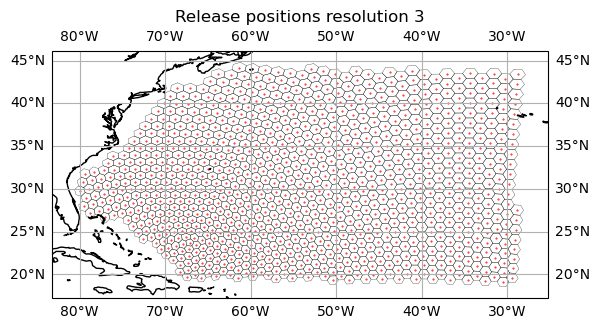

In [41]:
plt.figure()
ax = plt.axes(projection=cartopy.crs.PlateCarree())
ax.coastlines()
ax.gridlines()
ax.scatter(particles_h3.centroid_lons, particles_h3.centroid_lats, transform=cartopy.crs.PlateCarree(), s=0.2, c='r')
plt.title('Release positions resolution 3')
hexfunc.pcolorhex(ax, grid_release, colors='r', draw_edges=True, fill_polygons=False)
ax.gridlines(draw_labels=True, zorder=0, linestyle='--', linewidth=0.5)

In [13]:
# plt.figure()
# ax = plt.axes(projection=cartopy.crs.PlateCarree())
# ax.coastlines()
# ax.gridlines()
# ax.scatter(particles_h4.centroid_lons, particles_h4.centroid_lats, transform=cartopy.crs.PlateCarree(), s=0.2, c='r')
# plt.title('Release positions resolution 4')
# hexfunc.pcolorhex(ax, grid_release_h3, colors='r', draw_edges=True, fill_polygons=False)

In [14]:
# plt.figure()
# ax = plt.axes(projection=cartopy.crs.PlateCarree())
# ax.coastlines()
# ax.gridlines()
# ax.scatter(particles_h5.centroid_lons, particles_h5.centroid_lats, transform=cartopy.crs.PlateCarree(), s=0.2, c='r')
# plt.title('Release positions resolution 5')
# hexfunc.pcolorhex(ax, grid_release_h3, colors='r', draw_edges=True, fill_polygons=False)

## 4. Add espacial variations to the centroids 

## 4. Add continous release (Time dimension)

Because the release with h=3 will be underrepresented compared to h=4 or h=5 we need to compensate the number of particles not included in the space.

Increase number of particles released in time? What about in depth?

In [42]:
np.random.seed(2024)

In [44]:
int(particles_h3.hexagons[0], 16)

591327936217350143

In [45]:
particles_h3.hexagons[0:14]

['834d19fffffffff',
 '8334a9fffffffff',
 '832a2bfffffffff',
 '833588fffffffff',
 '833b91fffffffff',
 '831a5bfffffffff',
 '834db5fffffffff',
 '834d9efffffffff',
 '833b33fffffffff',
 '833accfffffffff',
 '834c14fffffffff',
 '833aa9fffffffff',
 '833b05fffffffff',
 '832ae2fffffffff']

In [46]:
# PArameters to tweak
number_particles_per_hexagon = 1000
std = 0.1

# MAking the arrays and lists
hexagon_list = []
hexagon_int_list = []
lon_list = []
lat_list = []



for i, hex in enumerate(particles_h3.hexagons):
    
    hexagon_list += [int(hex, 16)]*number_particles_per_hexagon
    lat_centroid = particles_h3.centroids[i][0] + np.random.normal(0, std, number_particles_per_hexagon)
    lon_centroid = particles_h3.centroids[i][1] + np.random.normal(0, std, number_particles_per_hexagon)
    
    lat_list += list(lat_centroid)
    lon_list += list(lon_centroid)
    
    hexagon_int_list += [int(hex, 16)]*number_particles_per_hexagon
    
grid_release = {'hexagons': hexagon_list, 'lons': lon_list, 'lats': lat_list}
grid_release = pd.DataFrame(grid_release)

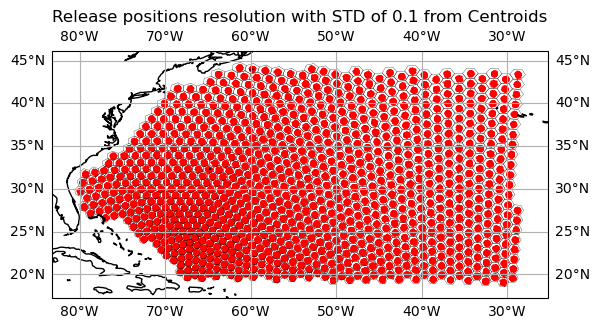

In [48]:
plt.figure()
ax = plt.axes(projection=cartopy.crs.PlateCarree())
ax.coastlines()
ax.gridlines()
# ax.set_extent([-80, -60, 25, 40], crs=cartopy.crs.PlateCarree())
ax.scatter(grid_release['lons'], grid_release['lats'], transform=cartopy.crs.PlateCarree(), s=0.2, c='r')
plt.title(f'Release positions resolution with STD of {std} from Centroids')
hexfunc.pcolorhex(ax, grid_release_h3, colors='r', draw_edges=True, fill_polygons=False)
ax.gridlines(draw_labels=True, zorder=0, linestyle='--', linewidth=0.5)

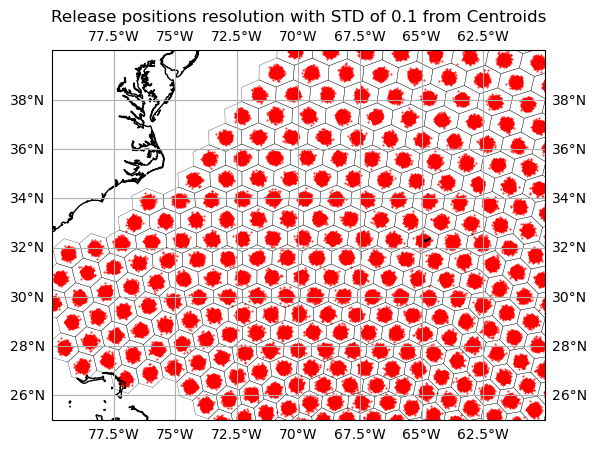

In [49]:
plt.figure()
ax = plt.axes(projection=cartopy.crs.PlateCarree())
ax.coastlines()
ax.gridlines()
ax.set_extent([-80, -60, 25, 40], crs=cartopy.crs.PlateCarree())
ax.scatter(grid_release['lons'], grid_release['lats'], transform=cartopy.crs.PlateCarree(), s=0.2, c='r')
plt.title(f'Release positions resolution with STD of {std} from Centroids')
hexfunc.pcolorhex(ax, grid_release_h3, colors='r', draw_edges=True, fill_polygons=False)
ax.gridlines(draw_labels=True, zorder=0, linestyle='--', linewidth=0.5)

In [51]:
#Save grid_release to a csv file
grid_release.to_csv('../data/hexgrid_release_std01.csv', index=False)

In [52]:
grid_release = pd.read_csv('../data/grid_release_std01.csv')

In [53]:
grid_release['hexagons'].values

array([591327936217350143, 591327936217350143, 591327936217350143, ...,
       591327661339443199, 591327661339443199, 591327661339443199])

In [58]:
np.int16

numpy.int16

In [54]:
grid_release

,hexagons,lons,lats
0,591327936217350143,-64.721141,26.242780
1,591327936217350143,-64.708595,26.299829
2,591327936217350143,-64.917838,25.987361
3,591327936217350143,-64.892337,26.109642
4,591327936217350143,-64.876746,26.256824
...,...,...,...
1002995,591327661339443199,-64.312737,29.241320
1002996,591327661339443199,-64.375828,29.082044
1002997,591327661339443199,-64.230735,29.282466
1002998,591327661339443199,-64.206361,29.128940


In [102]:
np.float64

numpy.float64